# Problem Definition

## Objective

To develop a reliable and automated car price estimation model that can effectively replace the expertise of a retiring, highly experienced sales team member.

## Background

Discount Motors faces a significant challenge as their most skilled sales team member, known for their exceptional ability to estimate car sales prices accurately, is retiring next month. This individual's departure poses a risk to their sales performance, as current team members' price estimates are typically about 30% off the mark, compared to the retiree's precise estimations.

The current process relies heavily on the retiring team member's expertise, where they assess car prices based on various information parameters. The goal is to transition from this manual, expert-dependent approach to a more systematic and automated process.

The new model should aim to estimate car prices with an accuracy within 10% of the actual selling price, significantly improving upon the current team's 30% deviation rate. Achieving this level of accuracy is critical for maintaining sales efficiency and competitiveness in the market.

Given the imminent retirement of the key team member, there is an urgency to develop a preliminary solution. This project's progress and findings will be shared in a presentation to the sales managers, facilitating informed decision-making for future strategies.

This project will leverage historical sales data, including car features such as model, year, mileage, fuel type, and others, to train a predictive model. This model aims to capture the retiring team member's expertise in a scalable, automated fashion.

# Import & Cleaning

## Loading and Inspecting the Toyota Dataset

Once the dataset has been loaded into a dataframe the info() method is used to print a concise summary of the dataframe. This summary includes the number of entries, the number of columns, the data types of each column, and the amount of memory used. This method is particularly useful for getting a quick overview of the dataframe, especially in understanding the types of data each column contains, and identifying if there are any missing values. In this case there are no missing values.

In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('toyota.csv')

#  Display information about the dataframe to better understand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


## Data Validation Checks for Toyota Dataset

| Column Name | Details |
|-------------|---------|
| model       | Character, the model of the car, 18 possible values|
| year        | Numeric, year of registration from 1998 to 2020|
| price       | Numeric, listed value of the car in GBP|
| transmission| Character, one of "Manual", "Automatic", "Semi-Auto" or "Other" |
| mileage     | Numeric, listed mileage of the car at time of sale |
| fuelType    | Character, one of "Petrol", "Hybrid", "Diesel" or "Other" |
| tax         | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car. |
| mpg         | Numeric, miles per gallon as reported by manufacturer |
| engineSize   | Numeric, listed engine size, one of 16 possible values |

Next I will perform a series of data validation checks on the dataframe. Here's a breakdown of the validation process:

1. **Model Validation**:
- Checks if the 'model' column has exactly 18 unique values, aligning with the expected variety of car models.

2. **Year Validation**:
- Ensures all values in the 'year' column fall within the range of 1998 to 2020, which is the expected period of vehicle registration.

3. **Price Validation**:
- Verifies that each entry in the 'price' column is a numeric value and non-negative, as prices cannot be negative.

4. **Transmission Validation**:
- Confirms that each value in the 'transmission' column is one of the specified categories: "Manual", "Automatic", "Semi-Auto", or "Other".

5. **Mileage Validation**:
- Ensures that all entries in the 'mileage' column are numeric and non-negative, as negative mileage is not plausible.

6. **Fuel Type Validation**:
- Checks if the 'fuelType' column contains only the specified fuel types: "Petrol", "Hybrid", "Diesel", or "Other".

7. **Tax Validation**:
- Validates that the 'tax' column has only numeric and non-negative values, fitting for a financial figure like tax.

8. **Miles Per Gallon (MPG) Validation**:
- Ensures the 'mpg' column contains only numeric and non-negative values, as negative values for miles per gallon are not meaningful.

9. **Engine Size Validation**:
- Checks if the 'engineSize' column contains exactly 16 unique values, as expected from the dataset specifications.

Finally, the results of these validations are aggregated into a dictionary, `validation_results`, providing a quick overview of whether each column meets its respective validation criteria. In this case everything everything meets the criteria provided by the table above. This step is crucial for ensuring data quality and integrity before proceeding with further analysis or modeling.

In [2]:
# Validation based on the provided table

# 1. Validate 'model': check for 18 unique values
model_validation = df['model'].nunique() == 18

# 2. Validate 'year': should be between 1998 and 2020
year_validation = df['year'].between(1998, 2020).all()

# 3. Validate 'price': should be numeric and non-negative
price_validation = df['price'].apply(lambda x: isinstance(x, (int, float)) and x >= 0).all()

# 4. Validate 'transmission': should be one of the specified categories
transmission_categories = ["Manual", "Automatic", "Semi-Auto", "Other"]
transmission_validation = df['transmission'].isin(transmission_categories).all()

# 5. Validate 'mileage': should be numeric and non-negative
mileage_validation = df['mileage'].apply(lambda x: isinstance(x, (int, float)) and x >= 0).all()

# 6. Validate 'fuelType': should be one of the specified categories
fuelType_categories = ["Petrol", "Hybrid", "Diesel", "Other"]
fuelType_validation = df['fuelType'].isin(fuelType_categories).all()

# 7. Validate 'tax': should be numeric and non-negative
tax_validation = df['tax'].apply(lambda x: isinstance(x, (int, float)) and x >= 0).all()

# 8. Validate 'mpg': should be numeric and non-negative
mpg_validation = df['mpg'].apply(lambda x: isinstance(x, (int, float)) and x >= 0).all()

# 9. Validate 'engineSize': check for 16 unique values
engineSize_validation = df['engineSize'].nunique() == 16

# Aggregating validation results
validation_results = {
    "model": model_validation,
    "year": year_validation,
    "price": price_validation,
    "transmission": transmission_validation,
    "mileage": mileage_validation,
    "fuelType": fuelType_validation,
    "tax": tax_validation,
    "mpg": mpg_validation,
    "engineSize": engineSize_validation
}

validation_results

{'model': True,
 'year': True,
 'price': True,
 'transmission': True,
 'mileage': True,
 'fuelType': True,
 'tax': True,
 'mpg': True,
 'engineSize': True}

# Exploratory Data Analysis

## Price Distribution Analysis

In my quest to develop a comprehensive car price estimation model, my initial step is to analyze the distribution of car prices within the dataset. This histogram, created using the matplotlib library, visualizes the spread and density of car prices. By setting the figure size and specifying 30 bins for the histogram, I can observe the frequency of different price ranges. Such a visualization is crucial for detecting anomalies like skewness or outliers, which might affect the predictive accuracy of our model. In this case the model is right-skewed.

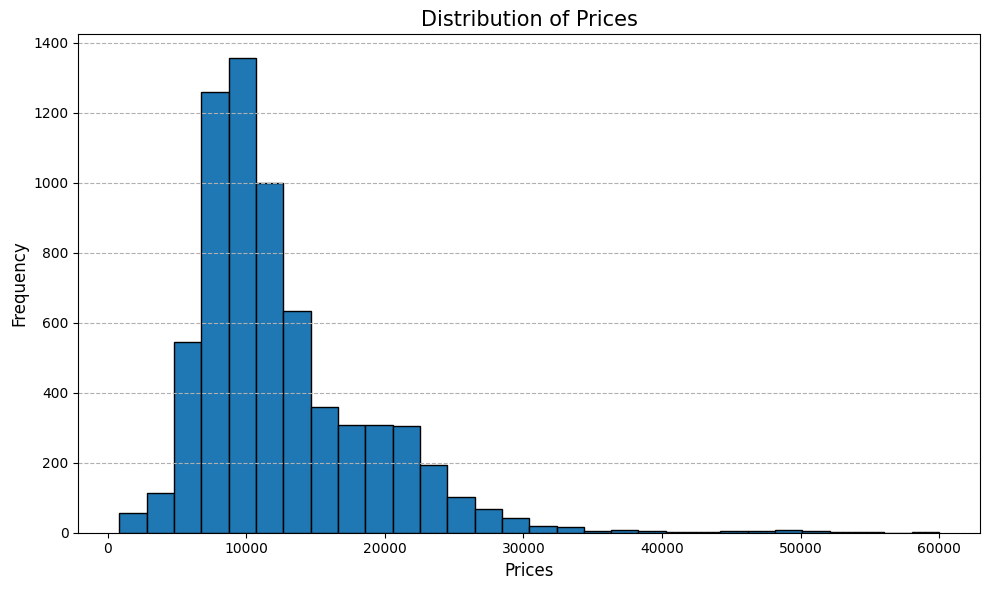

In [3]:
import matplotlib.pyplot as plt

# Plotting the distribution of price
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=30, edgecolor='black')

# Adding title and labels
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Prices', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

## Log Transformation of Price

Given the skewness in car price distribution, a log transformation is applied to normalize the data. This transformation, executed using numpy's `log1p` function, modifies each price value to its natural logarithm. This approach is particularly effective in stabilizing variance and making the data more amenable to analysis. Subsequently, we plot a histogram of these log-transformed prices. The resulting historgram does indeed have a more normal distribution. This step is crucial, as many statistical and machine learning models perform better with normally distributed variables. 

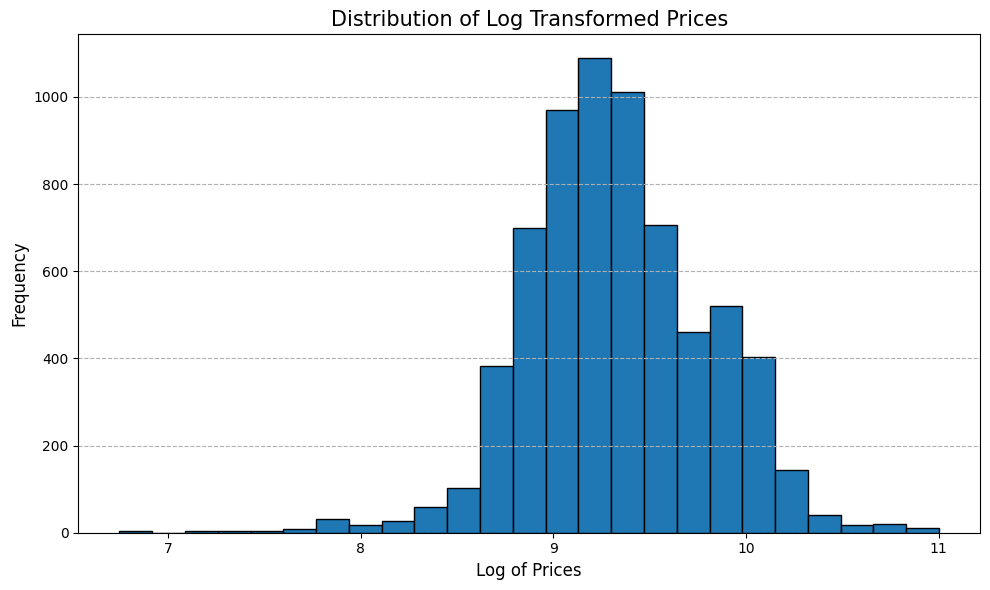

In [4]:
import numpy as np

# Applying log transformation
df['log_price'] = np.log1p(df['price'])

# Plotting the distribution of log-transformed prices
plt.figure(figsize=(10,6))
plt.hist(df['log_price'], bins=25, edgecolor='black')
plt.title('Distribution of Log Transformed Prices', fontsize=15)
plt.xlabel('Log of Prices', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Correlation Between Numeric Variables

To further understand the factors influencing car prices, I delve into the relationships between various numerical variables. Using seaborn’s `heatmap` function, we visualize the correlation matrix of key variables: 'log_price', 'mileage', 'tax', and 'mpg'. This heatmap illuminates the strength and direction of relationships between these variables. Based on the result there are a few insights to be made based on each category.

1. **Engine Size:**
    - There is a strong and positive relationship here suggesting that vehicles with bigger engines are more expensive. The strength of the relationship suggests it is a major factor.

2. **Year:**
    - There is a moderately strong and positive relationship here suggesting that newer vehicles are more expensive.

3. **MPG:**
    - There is a very weak relationsip here suggesting that mpg may not be a significant factor when it comes to vehicle price.

4. **Tax:**
    - There is a positive realtionship here suggesting that vehicles with higher taxes are more expensive, however the relationship is weak so it may not be the biggest factor.
 
5. **Mileage:**
    - There is a negative and moderate relationship here suggesting that as mileage goes up price goes down.

This visual representation is instrumental in identifying potential predictors for our car price estimation model. It helps in pinpointing variables that are closely interlinked, which is valuable for feature selection and understanding the underlying dynamics of car pricing.

Text(0.5, 1.0, 'Correlation Heatmap Between Numeric Variables')

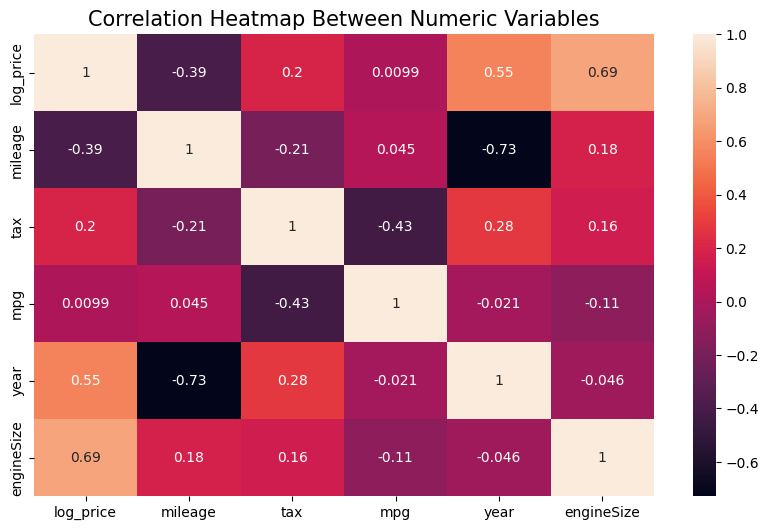

In [5]:
# Importing the seaborn library for advanced data visualization
import seaborn as sns

# Defining a list of numeric columns for which we want to analyze correlations
numeric_cols = ['log_price', 'mileage', 'tax', 'mpg', 'year', 'engineSize']

# Setting the size of the figure for the plot
plt.figure(figsize=(10,6))

# Creating a heatmap using seaborn. 
# The heatmap visualizes the correlation matrix of the specified numeric columns.
# 'df[numeric_columns].corr()' calculates the correlation matrix for the columns listed in numeric_columns.
# 'annot=True' adds the correlation coefficients on the heatmap for better readability.
sns.heatmap(df[numeric_cols].corr(), annot=True)

# Adding a title to the heatmap with a specified font size for clarity
plt.title('Correlation Heatmap Between Numeric Variables', fontsize=15)


## Visualizing Log Price Distributions Across Key Categories

Based on the box plots provided for the distribution of `price` across different categorical variables, here are some insights:

1. **Model:**
   - There's a wide range of prices among different car models. Some models, like the Verso S and Urban Cruiser, show a narrow price range indicating less variability in their market prices. In contrast, models like the Corolla and RAV4 exhibit a wide price range, which could suggest a variety of trims and options affecting the price.
   - Outliers are present in many models, indicating some vehicles are priced significantly higher or lower than the median. These could be special editions or models with rare features.

2. **Fuel Type:**
   - Hybrid cars have a higher median price compared to other fuel types, suggesting they may be valued higher in the market, possibly due to their perceived environmental benefits or lower running costs.
   - Diesel and Other fuel types seem to have a wider range of prices, which might reflect a broader diversity in the types of vehicles using these fuels.

3. **Transmission:**
   - Automatic and Semi-Auto transmissions have a higher median price than Manual, which might reflect consumer preferences for convenience or the higher cost associated with more advanced transmission technology.
   - There are outliers across all transmission types, but particularly for Automatic, suggesting some high-end models with automatic transmission are priced much higher than the median.

**General Observations:**
- The presence of outliers in all categories indicates that while there are general trends, individual vehicle prices can be significantly influenced by factors not captured by these categories alone.
- The spread of prices within each category, especially where there are wide interquartile ranges, suggests that other vehicle attributes or market factors may have a strong influence on pricing.
- The trends observed in hybrid fuel types and automatic transmissions may reflect both consumer preferences and industry trends towards environmentally friendly and technologically advanced vehicles.

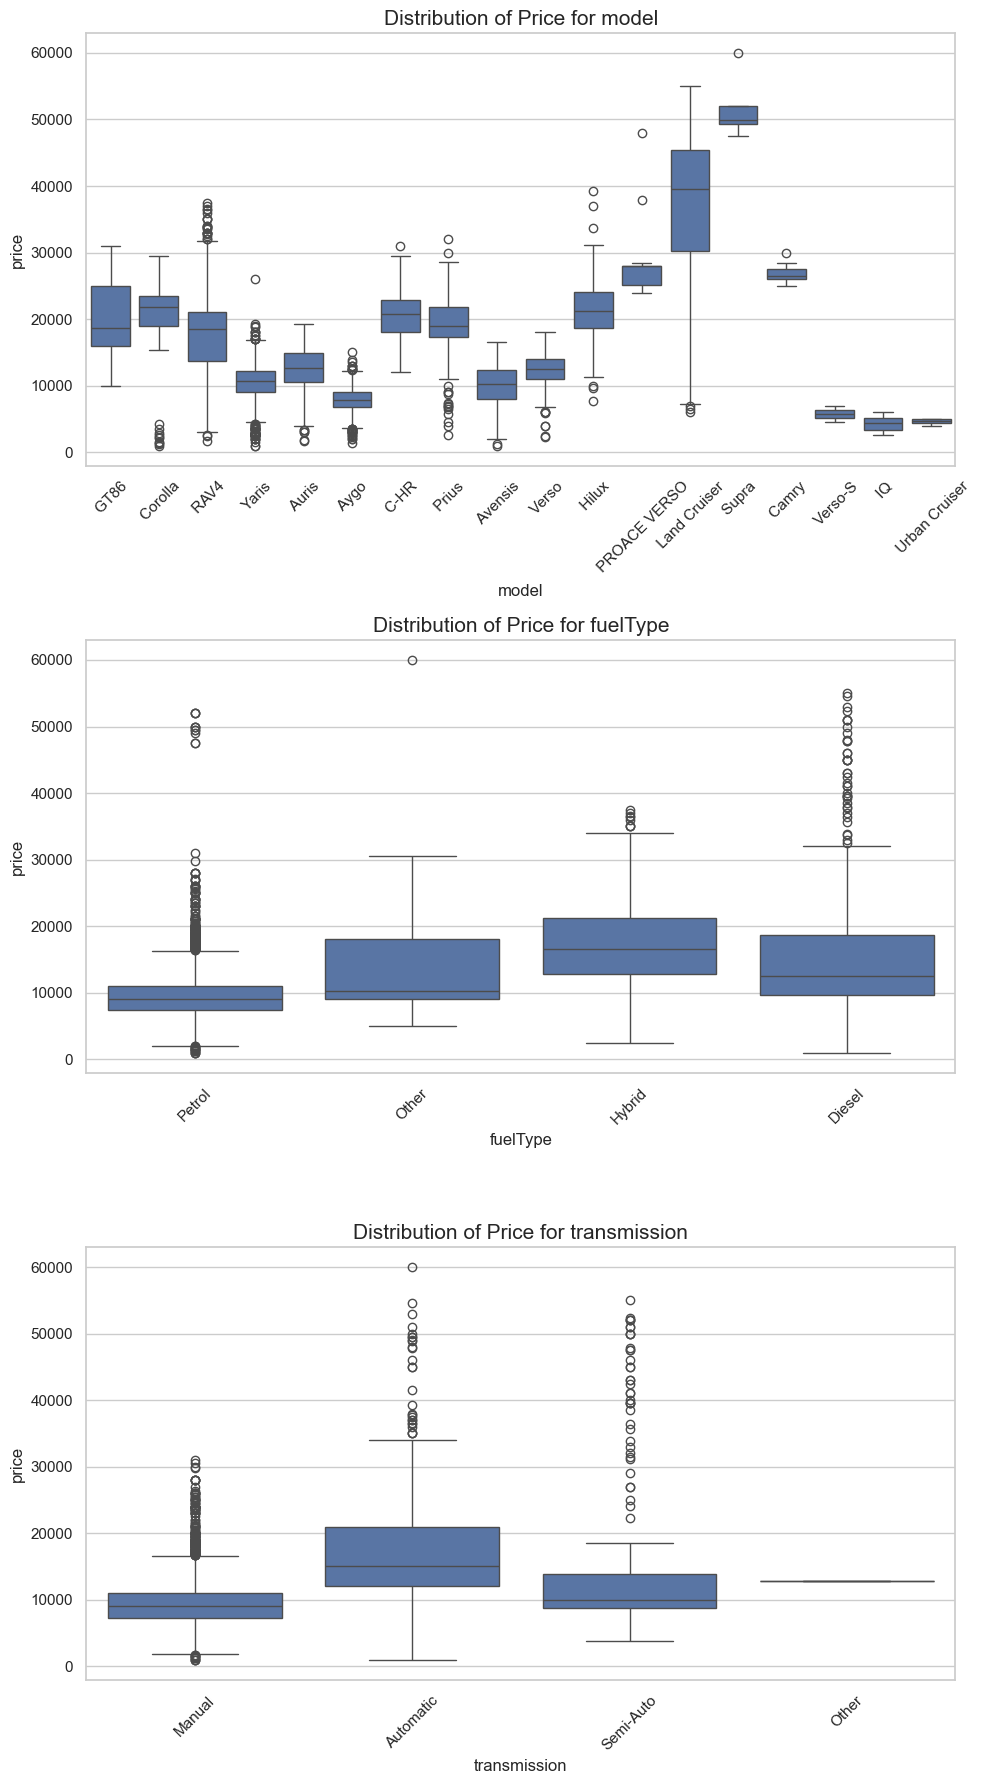

In [6]:
# List the categorical variables
categorical_cols = ['model', 'fuelType', 'transmission']

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 6 * len(categorical_cols)))

# Loop through each categorical column and create a box plot for each
for i, column in enumerate(categorical_cols):
    sns.boxplot(x=column, y='price', data=df, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Distribution of Price for {column}', fontsize=15)
    
    # Rotate x-axis labels for better readability if necessary
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Model Development

## Prep For Linear Regression Model

This code prepares data for predicting vehicle prices using a Linear Regression model since this is a regression problem. It separates the features (like mileage, year, etc.) from the target variable, which is the logarithm of the price. Using the logarithm helps make the model more accurate, especially when dealing with a wide range of prices.

The code includes steps to handle different types of data: numerical data is used as-is, while categorical data (like car model and fuel type) is converted into a format that the model can understand, a process known as one-hot encoding.

A Linear Regression model is then set up within a pipeline, a tool that ensures the data is processed correctly before it's used for predictions. The dataset is split into two parts: one for training the model and the other for testing its accuracy.

After training, the model's predictions are compared to actual prices to evaluate its accuracy. This is done using standard metrics that tell us how close the model's predictions are to the real prices and how well the model captures the overall trends in the data.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparing the data
numeric_cols = ['mileage', 'tax', 'mpg', 'year', 'engineSize']

# Selecting the features and the target variable
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

# Preprocessing for numerical data (no changes needed here)
numerical_transformer = 'passthrough'

# Preprocessing for categorical data: One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Model: Linear Regression
linear_model = LinearRegression()

# Creating a pipeline that combines the preprocessing with the model
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', linear_model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
lr.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_lr = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

NameError: name 'y_pred' is not defined

## Comparison Model using Random Forest

This code sets up and trains a Random Forest Regressor model, a sophisticated machine learning technique, for predicting vehicle prices. A Random Forest model is like a collection of decision trees, each making its own predictions, and the final output is determined by averaging these predictions. This approach usually leads to higher accuracy and better handling of complex data relationships compared to using a single decision tree.

In this code, the Random Forest model is configured with 100 trees (`n_estimators=100`), and a fixed `random_state` is set for reproducibility of results. The model is integrated into a pipeline that includes the previously defined preprocessing steps. This pipeline ensures that all data transformations are applied consistently before the model is used.

The model is then trained (`fit`) on a portion of the data (training set), and its performance is evaluated on a separate part of the data (testing set) that it hasn't seen during training. This evaluation is crucial to assess how well the model can generalize to new, unseen data.

After training, the model makes predictions on the test set, and these predictions are evaluated using three standard metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). MAE and MSE provide measures of how far off the predictions are from the actual prices, with lower values indicating better accuracy. R² indicates how well the model's predictions match the actual prices, with values closer to 1 suggesting higher accuracy. 

Overall, this code demonstrates the use of a more advanced modeling technique to potentially achieve better predictions for vehicle prices.

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Model: Random Forest Regressor
randomForest_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', randomForest_model)])
# Train the model
rf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

(0.06920240768587319, 0.009919009896627798, 0.9568340844645551)

## Actual Price vs Predicted Price

After comparing the two models and there MAE, MSE, and R^2 scores it seems the Random Forest is the more accurate of the two. The next step then is to take the log_price from the Random Forest predictions and convert them back to regular prices that would actually be used. These predictions will then be comapred to actual prices. In the scatterplot below it can be seen that the predictions seem to track well with the actual prices. 

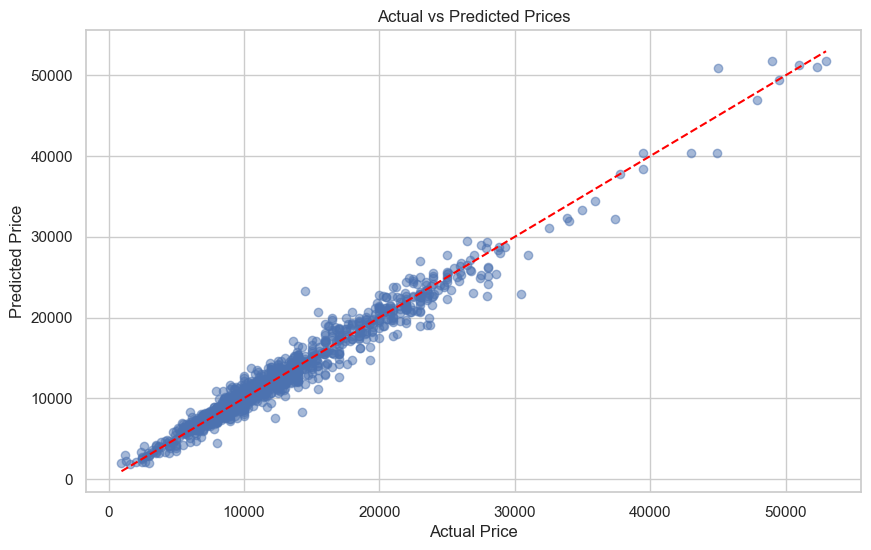

In [37]:
# Converting the predicted log prices back to regular prices
y_pred_price_rf = np.exp(y_pred_rf)

# Prepare a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': np.exp(y_test),
    'Predicted Price': y_pred_price_rf
})

# Assuming comparison_df contains columns 'Actual Price' and 'Predicted Price'
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Price'], comparison_df['Predicted Price'], alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()], 
         [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()], 
         color='red', linestyle='--')  # Diagonal line for reference
plt.show()

## Accuracy of Predicted Prices

Now the next step would be see how well the model is compared to the current team memebers who can make predictions within 30% of the actual prices and compared to the soon to be retired memeber who can make predictions within 10% of the actual price.

After calcualtions are done it can be seen that 98.9% of predictions are within 30% of actual prices suggesting the model is just as good as the current team the majority of the time.

It can also be seen that 76.7% of predictions are within 10% of actual prices suggesting that most of the time the model is just as accurate as the soon to be retired team memeber.

In [31]:
# Calculating whether the predicted prices are within 10% of the actual prices
comparison_df['Within 30%'] = np.abs(comparison_df['Predicted Price'] - comparison_df['Actual Price']) <= 0.30 * comparison_df['Actual Price']

# Calculating the percentage of predictions within 30% of the actual prices
percentage_within_30 = comparison_df['Within 30%'].mean() * 100

percentage_within_30

98.88724035608308

In [26]:
# Calculating whether the predicted prices are within 10% of the actual prices
comparison_df['Within 10%'] = np.abs(comparison_df['Predicted Price'] - comparison_df['Actual Price']) <= 0.10 * comparison_df['Actual Price']

# Calculating the percentage of predictions within 10% of the actual prices
percentage_within_10 = comparison_df['Within 10%'].mean() * 100

percentage_within_10

76.70623145400593

## Feature Importances

The next step is to extract feature importances and see what influences price the most. By analyzing these importances, you can gain insights into which factors are most influential in determining vehicle prices according to your model. This information can be valuable for both improving the model and understanding the underlying factors that drive vehicle pricing in the real world. For instance, features like the make and model of the vehicle, its age, mileage, or engine size might turn out to be significant predictors. This analysis can guide future data collection, feature engineering, and provide valuable business insights.

In [29]:
# Extracting feature importances from the Random Forest model
feature_importances = rf.named_steps['model'].feature_importances_

# Extracting feature names from the preprocessor
# Note: OneHotEncoder adds features for each unique category, so we need to handle them
one_hot_features = rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
all_features = numeric_cols + list(one_hot_features)

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 features for simplicity
feature_importance_df.head(10)

,Feature,Importance
4,engineSize,0.520647
3,year,0.308538
2,mpg,0.056777
0,mileage,0.046121
28,transmission_Manual,0.017081
1,tax,0.009355
5,model_ Auris,0.008618
27,transmission_Automatic,0.007745
14,model_ Land Cruiser,0.006493
6,model_ Avensis,0.004816


# Recommendations

### 1. Finalize and Deploy the Predictive Model
- **Choose the Best Model**: Based on the analysis, the Random Forest model seems to be performing well. Finalize this model as it offers a good balance between accuracy and interpretability.
- **Continuous Improvement**: Regularly update the model with new data and refine it based on changing market conditions and inventory.

### 2. Integrate the Model into the Sales Process
- **User-Friendly Interface**: Develop an easy-to-use interface for the sales team to input car features and receive price estimates.
- **Training and Onboarding**: Provide training for the sales team on how to use the model effectively and interpret its predictions.

### 3. Monitor and Evaluate Performance
- **Performance Tracking**: Regularly evaluate the model's predictions against actual sale prices and adjust thresholds or model parameters as needed.
- **Feedback Loop**: Encourage the sales team to provide feedback on the model's performance and suggestions for improvement.

### 4. Enhance the Model with Additional Data
- **Expand Data Sources**: Consider incorporating additional data sources like regional market trends, economic indicators, or customer preferences to enhance prediction accuracy.
- **Feature Engineering**: Explore advanced feature engineering techniques to capture more nuanced aspects of pricing.

### 5. Future Model Enhancements
- **Experiment with Other Models**: While the Random Forest model is effective, periodically test other models (like Gradient Boosting or Neural Networks) to see if they offer better performance.
- **Explainability and Interpretability**: Since sales decisions are crucial, ensure that the model's predictions are interpretable. Tools like SHAP (SHapley Additive exPlanations) can be used to explain the output of machine learning models.

### 6. Risk Management and Contingency Planning
- **Set Realistic Expectations**: While the aim is for a 10% deviation, initially, the model might not always match the retiring expert's precision. Prepare for a transitional period where manual adjustments might still be needed.
- **Develop a Contingency Plan**: In case the model underperforms or faces technical issues, have a backup plan. This could involve temporary reliance on market averages or consultations with external experts.

### 7. Long-term Strategic Planning
- **Scalability and Adaptability**: As the business grows, ensure that the model scales effectively and adapts to new types of vehicles or market conditions.
- **Invest in Data Infrastructure**: A robust data collection and management system will be crucial for the ongoing effectiveness of the model.

By following these recommendations, Discount Motors can effectively transition to a data-driven approach for car price estimation, maintaining sales performance and market competitiveness in the absence of their expert team member.